In [ ]:
# 2000 ケースずつ実行する

In [1]:
import sys
from pathlib import Path
from datetime import datetime
from threading import Thread
from subprocess import Popen, PIPE
from concurrent.futures import ThreadPoolExecutor, as_completed

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [2]:
!mkdir 010

mkdir: cannot create directory ‘010’: File exists


In [3]:
%cd 010

/home/user/Desktop/ahc008/notebooks/010


In [4]:
!seq 5000 6999 > seeds.txt

In [5]:
!../../tools/target/release/gen seeds.txt

In [6]:
!clang++ ../../long.cpp -std=c++17 -o long.out
!clang++ ../../short.cpp -std=c++17 -o short.out

In file included from ../../long.cpp:2:
../../answer.cpp:26:2: warning: "NDEBUG " [-W#warnings]
#warning "NDEBUG マクロが定義されてないよ！動作が遅くなるかもしれないよ！"
 ^
1 warning generated.
In file included from ../../short.cpp:2:
../../answer.cpp:26:2: warning: "NDEBUG " [-W#warnings]
#warning "NDEBUG マクロが定義されてないよ！動作が遅くなるかもしれないよ！"
 ^
1 warning generated.


In [7]:
!cat in/0000.txt

19
19 5 3
29 14 2
20 16 1
24 19 3
26 29 2
18 7 4
20 3 3
12 27 4
19 16 5
25 8 5
13 8 4
15 20 3
15 1 3
13 30 4
21 26 4
24 20 3
11 27 3
20 1 1
23 24 4
6
14 2
18 29
29 19
29 13
16 21
2 18
16866046969572741985


In [9]:
# 入力ファイルから特徴量取得

N = 2000

X = []

for file_id in range(N):
    file = f"in/{file_id:04d}.txt"
    with open(file) as f:
        n_pets = int(f.readline())
        pet_counts = [0] * 6
        for _ in range(n_pets):
            _, _, pet_type = map(int, f.readline().split())
            pet_counts[pet_type] += 1
        n_human = int(f.readline())
    X.append([n_pets] + pet_counts[1:] + [n_human])

features = ["n_pets"] + [f"pet{i}" for i in range(1, 6)] + ["n_human"]
df = pd.DataFrame(X, columns=features)
df

,n_pets,pet1,pet2,pet3,pet4,pet5,n_human
0,19,2,2,7,6,2,6
1,20,7,3,5,1,4,6
2,15,4,3,2,4,2,8
3,20,6,4,7,1,2,7
4,19,3,4,6,4,2,5
...,...,...,...,...,...,...,...
1995,15,2,2,5,3,3,8
1996,17,4,3,3,4,3,7
1997,12,2,2,1,6,1,9
1998,19,1,4,3,6,5,10


In [10]:
# N ケース実行して得点を得る関数

def get_scores(cmd):
    scores = [0] * N

    def read_stream(name, in_file, out_file):
        for line in in_file:
            print(f"[{name}] {line.strip()}", file=out_file)
            try:
                scores[name] = int(line.strip().split()[-1])
            except:
                pass

    def run(cmd, name):
        proc = Popen(cmd, stdout=PIPE, stderr=PIPE, universal_newlines=True, shell=True)
        stdout_thread = Thread(target=read_stream, args=(name, proc.stdout, sys.stdout))
        stderr_thread = Thread(target=read_stream, args=(name, proc.stderr, sys.stderr))
        stdout_thread.start()
        stderr_thread.start()
        proc.wait()
        return proc

    with ThreadPoolExecutor(7) as executor:
        futures = []
        for i in range(N):
            out_file = "/dev/null"
            cmd_test = f"../../tools/target/release/tester {cmd} < ./in/{i:04d}.txt > {out_file}"
            futures.append(executor.submit(run, cmd_test, i))
        as_completed(futures)

    print(f"Mean Score = {sum(scores) / len(scores)}")
    
    return scores

In [11]:
scores_long = get_scores("./long.out")

[2] Score = 57444444
[6] Score = 51666667
[0] Score = 49666667
[5] Score = 59888889
[1] Score = 50555556
[3] Score = 51000000
[4] Score = 49444444
[7] Score = 59222222
[9] Score = 26388889
[8] Score = 58111111
[11] Score = 61666667
[10] Score = 49444444
[12] Score = 51444444
[13] Score = 59888889
[14] Score = 57888889
[17] Score = 55666667
[19] Score = 57888889
[16] Score = 57888889
[15] Score = 52333333
[18] Score = 56333333
[20] Score = 62555556
[22] Score = 62333333
[21] Score = 58777778
[24] Score = 56333333
[25] Score = 62111111
[26] Score = 48555556
[27] Score = 49000000
[23] Score = 55666667
[30] Score = 60333333
[31] Score = 58555556
[29] Score = 50555556
[32] Score = 58111111
[28] Score = 57000000
[33] Score = 53000000
[34] Score = 54555556
[35] Score = 61222222
[38] Score = 61444444
[37] Score = 50333333
[36] Score = 50777778
[39] Score = 56333333
[40] Score = 59666667
[41] Score = 27166667
[42] Score = 56333333
[43] Score = 61000000
[46] Score = 56333333
[44] Score = 2961111

[363] Score = 49888889
[365] Score = 51222222
[366] Score = 52777778
[367] Score = 60555556
[369] Score = 58333333
[370] Score = 56555556
[368] Score = 55222222
[372] Score = 61666667
[371] Score = 56555556
[373] Score = 58111111
[374] Score = 53888889
[375] Score = 59888889
[376] Score = 60555556
[377] Score = 61000000
[380] Score = 63444444
[378] Score = 54111111
[379] Score = 59222222
[381] Score = 55444444
[382] Score = 57000000
[384] Score = 56111111
[383] Score = 51666667
[387] Score = 59888889
[385] Score = 59222222
[386] Score = 59666667
[388] Score = 63444444
[389] Score = 62111111
[390] Score = 26388889
[392] Score = 52777778
[391] Score = 51222222
[393] Score = 26055556
[394] Score = 53444444
[395] Score = 65666667
[398] Score = 60333333
[396] Score = 52555556
[397] Score = 50111111
[399] Score = 62333333
[400] Score = 58111111
[401] Score = 50333333
[403] Score = 62777778
[402] Score = 26277778
[406] Score = 60555556
[404] Score = 55888889
[407] Score = 61222222
[405] Score

[721] Score = 52333333
[722] Score = 50777778
[724] Score = 58555556
[725] Score = 60555556
[723] Score = 25833333
[726] Score = 62777778
[727] Score = 53000000
[728] Score = 58777778
[729] Score = 57444444
[732] Score = 63444444
[731] Score = 51000000
[730] Score = 12305556
[733] Score = 58777778
[734] Score = 54555556
[735] Score = 56111111
[736] Score = 56333333
[737] Score = 55000000
[738] Score = 59888889
[739] Score = 58555556
[741] Score = 27722222
[740] Score = 49888889
[742] Score = 59666667
[743] Score = 53000000
[744] Score = 48777778
[745] Score = 52777778
[746] Score = 53000000
[748] Score = 55666667
[747] Score = 58111111
[750] Score = 65000000
[749] Score = 53222222
[752] Score = 53222222
[751] Score = 54555556
[753] Score = 62333333
[754] Score = 52777778
[756] Score = 57666667
[757] Score = 62111111
[755] Score = 7319444
[759] Score = 55000000
[758] Score = 27944444
[760] Score = 51444444
[763] Score = 60777778
[762] Score = 60333333
[761] Score = 53000000
[766] Score 

[1075] Score = 55444444
[1076] Score = 52111111
[1077] Score = 55666667
[1078] Score = 57666667
[1080] Score = 52555556
[1079] Score = 56333333
[1081] Score = 55666667
[1082] Score = 63888889
[1083] Score = 52111111
[1086] Score = 62777778
[1085] Score = 50777778
[1087] Score = 57444444
[1084] Score = 50555556
[1089] Score = 58111111
[1088] Score = 51000000
[1090] Score = 58555556
[1092] Score = 58111111
[1091] Score = 55888889
[1093] Score = 51000000
[1094] Score = 55444444
[1096] Score = 55222222
[1095] Score = 57000000
[1097] Score = 58111111
[1098] Score = 55666667
[1099] Score = 53444444
[1101] Score = 57666667
[1100] Score = 30500000
[1103] Score = 57000000
[1102] Score = 52333333
[1104] Score = 56333333
[1106] Score = 56777778
[1105] Score = 60333333
[1107] Score = 64111111
[1109] Score = 55000000
[1108] Score = 52777778
[1110] Score = 62777778
[1111] Score = 60333333
[1112] Score = 61000000
[1114] Score = 58777778
[1113] Score = 56111111
[1116] Score = 61000000
[1115] Score = 5

[1417] Score = 56333333
[1418] Score = 51888889
[1420] Score = 55666667
[1419] Score = 6819444
[1421] Score = 49666667
[1423] Score = 59000000
[1422] Score = 62777778
[1425] Score = 52333333
[1424] Score = 57444444
[1426] Score = 59222222
[1427] Score = 52333333
[1428] Score = 60111111
[1430] Score = 54111111
[1429] Score = 54333333
[1432] Score = 53444444
[1431] Score = 49888889
[1434] Score = 59222222
[1433] Score = 59222222
[1435] Score = 50333333
[1437] Score = 58555556
[1436] Score = 62333333
[1438] Score = 60111111
[1439] Score = 58111111
[1440] Score = 59888889
[1441] Score = 58777778
[1443] Score = 65666667
[1444] Score = 57888889
[1442] Score = 26055556
[1445] Score = 62777778
[1446] Score = 61666667
[1448] Score = 59888889
[1447] Score = 56333333
[1449] Score = 59888889
[1451] Score = 53666667
[1450] Score = 56333333
[1452] Score = 50333333
[1453] Score = 50333333
[1454] Score = 55000000
[1455] Score = 48777778
[1456] Score = 47444444
[1457] Score = 28833333
[1458] Score = 55

[1760] Score = 65000000
[1759] Score = 49444444
[1761] Score = 50111111
[1762] Score = 55000000
[1764] Score = 55888889
[1763] Score = 54333333
[1765] Score = 54555556
[1766] Score = 59222222
[1768] Score = 51000000
[1767] Score = 52777778
[1770] Score = 60333333
[1769] Score = 61666667
[1771] Score = 56777778
[1772] Score = 64777778
[1773] Score = 61222222
[1774] Score = 56777778
[1775] Score = 64333333
[1777] Score = 60111111
[1776] Score = 52111111
[1778] Score = 58111111
[1779] Score = 62777778
[1781] Score = 52333333
[1780] Score = 55000000
[1782] Score = 55222222
[1783] Score = 52777778
[1785] Score = 58111111
[1784] Score = 49888889
[1786] Score = 13138889
[1787] Score = 54111111
[1788] Score = 59666667
[1789] Score = 65444444
[1791] Score = 63444444
[1790] Score = 60333333
[1792] Score = 59000000
[1793] Score = 25277778
[1794] Score = 58777778
[1796] Score = 59444444
[1795] Score = 50555556
[1797] Score = 53444444
[1798] Score = 52111111
[1799] Score = 59222222
[1800] Score = 3

Mean Score = 54283836.8005


[1999] Score = 58777778


In [12]:
scores_short = get_scores("./short.out")

[5] Score = 69111111
[2] Score = 61777778
[3] Score = 15083333
[0] Score = 30888889
[6] Score = 57333333
[1] Score = 60888889
[4] Score = 16388889
[7] Score = 66444444
[8] Score = 65555556
[11] Score = 68000000
[13] Score = 63888889
[9] Score = 58222222
[10] Score = 60888889
[12] Score = 56666667
[14] Score = 64111111
[16] Score = 64555556
[17] Score = 63333333
[15] Score = 7416667
[20] Score = 67555556
[18] Score = 30944444
[19] Score = 58666667
[21] Score = 62888889
[22] Score = 68555556
[24] Score = 64888889
[25] Score = 33222222
[27] Score = 60222222
[26] Score = 56222222
[23] Score = 7791667
[29] Score = 59333333
[28] Score = 32222222
[30] Score = 66000000
[31] Score = 60777778
[32] Score = 63444444
[34] Score = 60333333
[33] Score = 15194444
[35] Score = 68555556
[36] Score = 59777778
[37] Score = 29111111
[38] Score = 66000000
[39] Score = 66444444
[40] Score = 64888889
[41] Score = 3895833
[42] Score = 62444444
[43] Score = 67555556
[44] Score = 65444444
[45] Score = 33222222
[

[366] Score = 57666667
[367] Score = 61888889
[370] Score = 59222222
[371] Score = 62777778
[369] Score = 64333333
[372] Score = 66555556
[368] Score = 14694444
[373] Score = 63444444
[374] Score = 60222222
[375] Score = 65444444
[377] Score = 62333333
[376] Score = 63333333
[379] Score = 64444444
[378] Score = 7722222
[380] Score = 69111111
[381] Score = 61222222
[382] Score = 63000000
[384] Score = 63777778
[383] Score = 59222222
[386] Score = 66888889
[385] Score = 63333333
[387] Score = 65555556
[389] Score = 64444444
[388] Score = 18138889
[390] Score = 56666667
[393] Score = 59222222
[392] Score = 61888889
[391] Score = 15444444
[394] Score = 28333333
[395] Score = 65444444
[396] Score = 27888889
[398] Score = 60888889
[399] Score = 69666667
[397] Score = 58222222
[400] Score = 62333333
[401] Score = 53111111
[403] Score = 66555556
[402] Score = 7875000
[404] Score = 67000000
[406] Score = 66444444
[407] Score = 66555556
[405] Score = 62888889
[408] Score = 62888889
[409] Score =

[726] Score = 68000000
[728] Score = 62444444
[727] Score = 58333333
[729] Score = 33722222
[732] Score = 71666667
[731] Score = 58666667
[730] Score = 56666667
[733] Score = 63888889
[735] Score = 62444444
[734] Score = 62333333
[738] Score = 67000000
[736] Score = 62444444
[737] Score = 59777778
[739] Score = 34000000
[742] Score = 66444444
[743] Score = 56222222
[740] Score = 7625000
[741] Score = 33000000
[744] Score = 56111111
[745] Score = 61222222
[746] Score = 33833333
[747] Score = 64444444
[748] Score = 61333333
[750] Score = 33777778
[753] Score = 70111111
[749] Score = 14833333
[752] Score = 61111111
[751] Score = 56222222
[754] Score = 61333333
[757] Score = 67000000
[756] Score = 61333333
[755] Score = 29444444
[759] Score = 61777778
[760] Score = 58666667
[758] Score = 4090278
[761] Score = 65555556
[762] Score = 66555556
[763] Score = 70111111
[766] Score = 58222222
[764] Score = 15722222
[767] Score = 61222222
[765] Score = 28833333
[768] Score = 57777778
[770] Score =

[1080] Score = 28611111
[1082] Score = 34555556
[1083] Score = 59111111
[1086] Score = 67000000
[1087] Score = 62888889
[1085] Score = 60777778
[1089] Score = 63444444
[1084] Score = 3798611
[1088] Score = 1000000
[1090] Score = 60888889
[1092] Score = 30944444
[1091] Score = 16472222
[1095] Score = 64555556
[1094] Score = 63444444
[1093] Score = 28611111
[1096] Score = 33055556
[1097] Score = 66000000
[1099] Score = 59333333
[1098] Score = 56222222
[1100] Score = 63444444
[1101] Score = 60888889
[1102] Score = 54000000
[1103] Score = 59777778
[1104] Score = 64444444
[1106] Score = 59777778
[1105] Score = 62888889
[1107] Score = 68111111
[1108] Score = 56555556
[1109] Score = 29611111
[1110] Score = 34055556
[1111] Score = 64888889
[1112] Score = 67000000
[1114] Score = 61888889
[1113] Score = 62777778
[1116] Score = 63444444
[1115] Score = 59333333
[1117] Score = 30111111
[1118] Score = 69555556
[1119] Score = 63777778
[1120] Score = 66000000
[1121] Score = 58666667
[1122] Score = 551

[1424] Score = 62333333
[1425] Score = 58666667
[1427] Score = 62888889
[1426] Score = 64444444
[1430] Score = 60888889
[1428] Score = 32777778
[1429] Score = 60333333
[1431] Score = 58222222
[1433] Score = 68000000
[1434] Score = 66444444
[1432] Score = 58777778
[1435] Score = 58777778
[1436] Score = 67444444
[1437] Score = 64444444
[1438] Score = 33833333
[1439] Score = 62888889
[1441] Score = 64444444
[1440] Score = 32500000
[1443] Score = 68000000
[1445] Score = 70666667
[1442] Score = 28888889
[1444] Score = 64000000
[1446] Score = 68555556
[1447] Score = 63888889
[1448] Score = 66555556
[1449] Score = 66000000
[1451] Score = 60777778
[1452] Score = 30055556
[1450] Score = 15222222
[1453] Score = 56666667
[1454] Score = 61333333
[1455] Score = 57777778
[1456] Score = 27777778
[1457] Score = 62000000
[1459] Score = 61888889
[1458] Score = 2079861
[1460] Score = 59222222
[1461] Score = 64000000
[1462] Score = 57222222
[1463] Score = 59333333
[1465] Score = 67111111
[1464] Score = 58

[1767] Score = 15833333
[1770] Score = 63444444
[1768] Score = 57000000
[1769] Score = 15972222
[1771] Score = 63333333
[1772] Score = 33000000
[1773] Score = 64000000
[1775] Score = 68444444
[1774] Score = 63888889
[1777] Score = 65555556
[1776] Score = 60222222
[1778] Score = 62888889
[1779] Score = 65555556
[1780] Score = 15722222
[1781] Score = 59222222
[1783] Score = 58222222
[1782] Score = 31500000
[1785] Score = 62888889
[1784] Score = 14694444
[1786] Score = 7805556
[1787] Score = 64000000
[1788] Score = 64000000
[1789] Score = 68111111
[1790] Score = 65444444
[1791] Score = 70000000
[1792] Score = 64555556
[1793] Score = 28055556
[1796] Score = 65000000
[1794] Score = 59777778
[1798] Score = 60333333
[1795] Score = 58222222
[1797] Score = 60222222
[1799] Score = 66555556
[1800] Score = 65555556
[1802] Score = 63000000
[1805] Score = 64444444
[1804] Score = 64444444
[1801] Score = 14805556
[1803] Score = 61222222
[1807] Score = 60444444
[1806] Score = 62333333
[1808] Score = 68

Mean Score = 52686220.2615


[1997] Score = 65000000
[1999] Score = 61888889
[1998] Score = 28888889


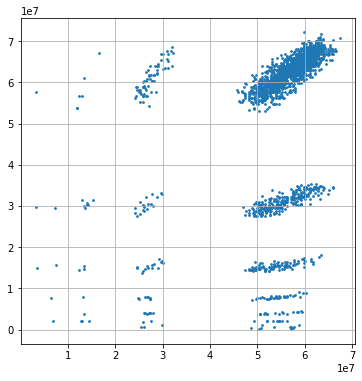

In [13]:
plt.figure(figsize=(6, 6))
plt.scatter(scores_long, scores_short, s=3)
plt.grid()
plt.show()

In [14]:
df["long"] = scores_long
df["short"] = scores_short

In [15]:
df.describe()

,n_pets,pet1,pet2,pet3,pet4,pet5,n_human,long,short
count,2000.000000,2000.000000,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2.000000e+03,2.000000e+03
mean,15.018000,2.991500,3.001500,3.0005,3.021500,3.003000,7.489500,5.428384e+07,5.268622e+07
std,3.174384,1.654024,1.717257,1.6682,1.699553,1.659327,1.682946,9.514034e+06,1.863663e+07
min,10.000000,0.000000,0.000000,0.0000,0.000000,0.000000,5.000000,3.229167e+06,1.299910e+05
25%,12.000000,2.000000,2.000000,2.0000,2.000000,2.000000,6.000000,5.233333e+07,3.500000e+07
50%,15.000000,3.000000,3.000000,3.0000,3.000000,3.000000,7.000000,5.633333e+07,6.122222e+07
75%,18.000000,4.000000,4.000000,4.0000,4.000000,4.000000,9.000000,5.988889e+07,6.488889e+07
max,20.000000,11.000000,10.000000,9.0000,10.000000,9.000000,10.000000,6.744444e+07,7.211111e+07


In [16]:
help(RandomForestRegressor)

Help on class RandomForestRegressor in module sklearn.ensemble._forest:

class RandomForestRegressor(ForestRegressor)
 |  RandomForestRegressor(n_estimators=100, *, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest regressor.
 |  
 |  A random forest is a meta estimator that fits a number of classifying
 |  decision trees on various sub-samples of the dataset and uses averaging
 |  to improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------

In [17]:
df_train = df[:N//2]
df_valid = df[N//2:]

In [109]:
n_estimators = 20
max_depth = 4

print("long")
reg_long = RandomForestRegressor(
    n_estimators=n_estimators,
    max_depth=max_depth,
    random_state=42
)
reg_long.fit(df_train[features], df_train["long"])
train_pred_long = reg_long.predict(df_train[features])
valid_pred_long = reg_long.predict(df_valid[features])
train_rmse = np.sqrt(np.mean((df_train["long"] - train_pred_long) ** 2))
valid_rmse = np.sqrt(np.mean((df_valid["long"] - valid_pred_long) ** 2))
print(f"train_rmse={train_rmse}")
print(f"valid_rmse={valid_rmse}")

print("short")
reg_short = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
reg_short.fit(df_train[features], df_train["short"])
train_pred_short = reg_short.predict(df_train[features])
valid_pred_short = reg_short.predict(df_valid[features])
train_rmse = np.sqrt(np.mean((df_train["short"] - train_pred_short) ** 2))
valid_rmse = np.sqrt(np.mean((df_valid["short"] - valid_pred_short) ** 2))
print(f"train_rmse={train_rmse}")
print(f"valid_rmse={valid_rmse}")

long
train_rmse=7364724.859168116
valid_rmse=7347870.741570237
short
train_rmse=13609350.363889856
valid_rmse=13775522.24767491


In [110]:
reg_long.estimators_[0].tree_.capacity

29

In [111]:
reg_long.estimators_[0].tree_.node_count

29

In [112]:
reg_long.estimators_[0].tree_.children_left

array([ 1,  2,  3,  4, -1, -1,  7, -1, -1, 10, 11, -1, -1, 14, -1, -1, 17,
       18, 19, -1, -1, 22, -1, -1, 25, 26, -1, -1, -1], dtype=int64)

In [113]:
reg_long.estimators_[0].tree_.children_right

array([16,  9,  6,  5, -1, -1,  8, -1, -1, 13, 12, -1, -1, 15, -1, -1, 24,
       21, 20, -1, -1, 23, -1, -1, 28, 27, -1, -1, -1], dtype=int64)

In [114]:
reg_long.estimators_[0].tree_.feature

array([ 0,  0,  0,  1, -2, -2,  2, -2, -2,  5,  6, -2, -2,  6, -2, -2,  6,
        1,  5, -2, -2,  6, -2, -2,  2,  4, -2, -2, -2], dtype=int64)

In [115]:
reg_long.estimators_[0].tree_.threshold

array([17.5, 13.5, 11.5,  4.5, -2. , -2. ,  0.5, -2. , -2. ,  5.5,  5.5,
       -2. , -2. ,  6.5, -2. , -2. ,  6.5,  3.5,  3.5, -2. , -2. ,  5.5,
       -2. , -2. ,  8.5,  3.5, -2. , -2. , -2. ])

In [116]:
reg_long.estimators_[0].tree_.value.shape

(29, 1, 1)

In [117]:
reg_long.estimators_[0].tree_.value.ravel()

array([53782868.063     , 57099485.44150418, 60152927.10752688,
       61610273.5879397 , 61921321.31351351, 57500000.07142857,
       58476557.4566474 , 50661616.09090909, 59007201.62345679,
       53816594.40173411, 54299037.13496932, 51463342.44262295,
       54951781.9509434 , 45952777.85      , 35430555.5       ,
       52967592.75      , 45338430.90780142, 39048772.73255814,
       34204238.        , 43133796.53333333, 28623263.91666667,
       43068705.80851064, 36697569.6       , 47788065.96296296,
       48098178.88265306, 48283155.29743589, 50349881.82978723,
       46359667.23762377, 12027778.        ])

In [118]:
reg_long.estimators_[0].tree_.impurity

array([1.09559101e+14, 4.83514645e+13, 1.93074079e+13, 1.16878986e+13,
       3.11913503e+12, 1.06745148e+14, 2.28187792e+13, 1.70705642e+14,
       8.34854236e+12, 5.87765327e+13, 4.81320067e+13, 1.51327476e+14,
       2.21005171e+13, 1.66648854e+14, 1.36600892e+14, 6.36617579e+13,
       1.66084335e+14, 2.64189588e+14, 3.04089338e+14, 2.66586419e+14,
       2.46545755e+14, 1.95446718e+14, 2.54446270e+14, 9.94032998e+13,
       9.80640717e+13, 9.18605747e+13, 3.02935282e+13, 1.41485468e+14,
       1.88000000e+02])

In [119]:
help(reg_long.estimators_[0].tree_)

Help on Tree object:

class Tree(builtins.object)
 |  Array-based representation of a binary decision tree.
 |  
 |  The binary tree is represented as a number of parallel arrays. The i-th
 |  element of each array holds information about the node `i`. Node 0 is the
 |  tree's root. You can find a detailed description of all arrays in
 |  `_tree.pxd`. NOTE: Some of the arrays only apply to either leaves or split
 |  nodes, resp. In this case the values of nodes of the other type are
 |  arbitrary!
 |  
 |  Attributes
 |  ----------
 |  node_count : int
 |      The number of nodes (internal nodes + leaves) in the tree.
 |  
 |  capacity : int
 |      The current capacity (i.e., size) of the arrays, which is at least as
 |      great as `node_count`.
 |  
 |  max_depth : int
 |      The depth of the tree, i.e. the maximum depth of its leaves.
 |  
 |  children_left : array of int, shape [node_count]
 |      children_left[i] holds the node id of the left child of node i.
 |      For leave

In [120]:
!ls

in  long.out  random_forest.cpp  random_forest.out  seeds.txt  short.out


In [121]:
help(reg_long)

Help on RandomForestRegressor in module sklearn.ensemble._forest object:

class RandomForestRegressor(ForestRegressor)
 |  RandomForestRegressor(n_estimators=100, *, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest regressor.
 |  
 |  A random forest is a meta estimator that fits a number of classifying
 |  decision trees on various sub-samples of the dataset and uses averaging
 |  to improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ---------

In [122]:
def dump_forest(reg):
    print(f"RandomForest<{reg.n_estimators}, 32>" "{")
    for tree in reg.estimators_:
        tree = tree.tree_
        print("DecisionTree<32>{")
        print(f"{tree.node_count},")
        print("{" + ",".join(map(str, tree.children_left)) + "},")
        print("{" + ",".join(map(str, tree.children_right)) + "},")
        print("{" + ",".join(map(str, tree.feature)) + "},")
        print("{" + ",".join(map(str, tree.threshold)) + "},")
        print("{" + ",".join(map(str, tree.value.ravel())) + "},")
        print("},")
    print("}")

In [123]:
dump_forest(reg_long)

RandomForest<20, 32>{
DecisionTree<32>{
29,
{1,2,3,4,-1,-1,7,-1,-1,10,11,-1,-1,14,-1,-1,17,18,19,-1,-1,22,-1,-1,25,26,-1,-1,-1},
{16,9,6,5,-1,-1,8,-1,-1,13,12,-1,-1,15,-1,-1,24,21,20,-1,-1,23,-1,-1,28,27,-1,-1,-1},
{0,0,0,1,-2,-2,2,-2,-2,5,6,-2,-2,6,-2,-2,6,1,5,-2,-2,6,-2,-2,2,4,-2,-2,-2},
{17.5,13.5,11.5,4.5,-2.0,-2.0,0.5,-2.0,-2.0,5.5,5.5,-2.0,-2.0,6.5,-2.0,-2.0,6.5,3.5,3.5,-2.0,-2.0,5.5,-2.0,-2.0,8.5,3.5,-2.0,-2.0,-2.0},
{53782868.063,57099485.44150418,60152927.10752688,61610273.5879397,61921321.31351351,57500000.071428575,58476557.456647396,50661616.09090909,59007201.62345679,53816594.401734106,54299037.134969324,51463342.44262295,54951781.950943395,45952777.85,35430555.5,52967592.75,45338430.90780142,39048772.73255814,34204238.0,43133796.53333333,28623263.916666668,43068705.80851064,36697569.6,47788065.96296296,48098178.88265306,48283155.297435895,50349881.82978723,46359667.237623766,12027778.0},
},
DecisionTree<32>{
31,
{1,2,3,4,-1,-1,7,-1,-1,10,11,-1,-1,14,-1,-1,17,18,19,-1,-1,2

In [124]:
!clang++ random_forest.cpp -o random_forest.out

In [125]:
!./random_forest.out

4.31338e+07
4.77881e+07
4.6051e+07
4.7166e+07


In [126]:
x = df.loc[0:1, features].values.astype(np.float32)
print(x.tolist())
reg_long.estimators_[0].tree_.predict(x)

[[19.0, 2.0, 2.0, 7.0, 6.0, 2.0, 6.0], [20.0, 7.0, 3.0, 5.0, 1.0, 4.0, 6.0]]


array([[43133796.53333333],
       [47788065.96296296]])

In [127]:
reg_long.predict(x)

array([46051035.6483681 , 47166046.09586997])

In [128]:
dump_forest(reg_short)

RandomForest<20, 32>{
DecisionTree<32>{
31,
{1,2,3,4,-1,-1,7,-1,-1,10,11,-1,-1,14,-1,-1,17,18,19,-1,-1,22,-1,-1,25,26,-1,-1,29,-1,-1},
{16,9,6,5,-1,-1,8,-1,-1,13,12,-1,-1,15,-1,-1,24,21,20,-1,-1,23,-1,-1,28,27,-1,-1,30,-1,-1},
{0,6,0,1,-2,-2,5,-2,-2,0,6,-2,-2,4,-2,-2,6,5,3,-2,-2,1,-2,-2,0,6,-2,-2,6,-2,-2},
{15.5,5.5,13.5,0.5,-2.0,-2.0,3.5,-2.0,-2.0,11.5,7.5,-2.0,-2.0,4.5,-2.0,-2.0,5.5,1.5,3.5,-2.0,-2.0,5.5,-2.0,-2.0,17.5,6.5,-2.0,-2.0,7.5,-2.0,-2.0},
{53156263.871,59993792.42805755,49054038.88505747,55857212.456140354,33777777.5,57523584.905660376,36128009.1,44115530.13636363,14162326.25,62023128.37313433,65322619.13142857,63779671.78787879,66256880.82568807,60059145.77891157,61339467.49583333,54368827.03703704,44593953.33558559,24298409.76811594,50169191.72727273,27854166.25,62920634.85714286,19391882.155172415,21411815.725490198,4675223.285714285,48328333.352,54643500.870229006,43555871.18181818,56881371.08256881,44937813.086065575,39036938.4893617,48635694.5},
},
DecisionTree<32>{
3